In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt
import numpy as np

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [33]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 28*28])
#encoder
W1 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[784, 256]))
b1 = tf.Variable(tf.zeros(dtype=tf.float32, shape=[256]))

W2 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[256, 128]))
b2 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[128]))

#decoder
W3 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[128, 256]))
b3 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[256]))

W4 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[256, 784]))
b4 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[784]))

In [34]:
encoder_in = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
encoder_out = tf.nn.sigmoid(tf.matmul(encoder_in, W2) + b2)

decoder_in = tf.nn.sigmoid(tf.matmul(encoder_out, W3) + b3)
decoder_out = tf.nn.sigmoid(tf.matmul(decoder_in, W4) + b4)

In [44]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=decoder_out))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [45]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

epoch :  0 , cost :  555.1501282251826
epoch :  1 , cost :  551.2724445099083
epoch :  2 , cost :  551.2632326030338
epoch :  3 , cost :  550.2349381512678
epoch :  4 , cost :  551.7542072100199
epoch :  5 , cost :  550.7701021521906
epoch :  6 , cost :  550.8815502369654
epoch :  7 , cost :  549.8448763815339
epoch :  8 , cost :  550.716198047149
epoch :  9 , cost :  550.5640279691241
epoch :  10 , cost :  550.3351334229094
epoch :  11 , cost :  549.9415658275691
epoch :  12 , cost :  550.2805644378234
epoch :  13 , cost :  550.1015483715059
epoch :  14 , cost :  550.3125367156428


C:\Users\JAEKYU\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


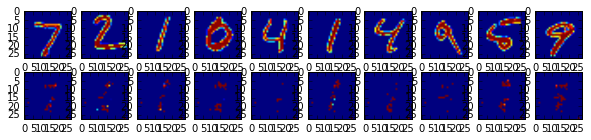

In [46]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(15):
        total_cost = 0
        for i in range(total_batch):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            op_val, cost_val = sess.run([optimizer, cost], feed_dict={X : x_batch})
            total_cost = total_cost + cost_val
            
        print("epoch : ", epoch, ",", "cost : ", total_cost / cost_val)
        
    encode_decode = sess.run(decoder_out, feed_dict={X:mnist.test.images[:10]})
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

In [47]:
#압축을 너무 크게 해서, 다시 복원했을때, 원본의 모습이 거의 사라진 모습을 확인해보는 예제였다.
#만일 압축을 1번만 하고, 다시 decode하면 더 명확하게 복원된 결과를 확인할 수 있을것이다.